## **Proyecto Final Integrador: Data Analytics — SynthData 🧠**

**Autora:** Valeria Velasquez    
**Comisión:** 25262  
**Fecha de última edición:** 07/12/2025
___


# ***Estructura del Proyecto***
###Etapa 1: Recopilación y Preparación de Datos
1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
2. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.
3. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.
###Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.
2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
###Etapa 3: Análisis de Datos
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.

###Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión) que representen las ventas con diferentes periodos de tiempo.
2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
3. Visualización Interactiva con Plotly: Construir un dashboard interactivo que combine múltiples visualizaciones, permitiendo al usuario explorar los datos dinámicamente.
4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.

## I) **Etapa 1: Recopilación y Preparación de Datos**
🎯**Objetivo:**

 Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

---

### **1️⃣ Entorno y Carga de Datos**
🎯**Objetivo**: Carga de sets de datos en Google Colab como DataFrames.

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv`  

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np

In [ ]:
# Montar la unidad de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Verificar que los archivos csv se encuentren en la carpeta Datasets
import os
os.listdir("/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets")

['Sets de datos.pdf',
 'clientes.csv',
 'marketing.csv',
 'ventas.csv',
 'marketing_clean.csv',
 'ventas_clean.csv',
 'clientes_clean.csv']

In [ ]:
# Rutas a los archivos en Drive
ruta_clientes = '/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets/clientes.csv'
ruta_marketing = '/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets/marketing.csv'
ruta_ventas = '/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets/ventas.csv'

# Leer los CSV como DataFrames
df_clientes = pd.read_csv(ruta_clientes)
df_marketing = pd.read_csv(ruta_marketing)
df_ventas = pd.read_csv(ruta_ventas)

# Validar las dimensiones para comprobar la carga correcta
print('\nDimensiones:')
print('Clientes:', df_clientes.shape)
print('Marketing:', df_marketing.shape)
print('Ventas:', df_ventas.shape)
print("-" * 50)

# Mostrar las primeras filas de cada dataset
print('--- Clientes ---')
display(df_clientes.head(3))
print('\n--- Marketing ---')
display(df_marketing.head(3))
print('\n--- Ventas ---')
display(df_ventas.head(3))


Dimensiones:
Clientes: (567, 5)
Marketing: (90, 6)
Ventas: (3035, 6)
--------------------------------------------------
--- Clientes ---


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85



--- Marketing ---


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024



--- Ventas ---


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


###2️⃣**Exploración inicial de los DataFrames con pandas (EDA)**
🎯**Objetivo:**

El propósito es comprender su estructura, tipos de datos, valores nulos y principales características estadísticas.
Para ello, se utilizarán métodos de pandas como `.info()`, `.describe()`, `.shape` y `.columns`. Este análisis permitirá detectar posibles problemas en los datos y orientar decisiones de limpieza o transformación.

In [ ]:
# Función para realizar un análisis exploratorio inicial del DataFrame (EDA)
def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("Shape:", df.shape)
    print("Columnas:", list(df.columns))
    print("\nTipos de datos (dtypes):")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas del DataFrame:")
    display(df.head())
    print("\nResumen estadístico de columnas numéricas:")
    display(df.describe(include='number'))
    print("*" * 100)

# Llamado a la función para analizar cada DataFrame
eda(df_clientes, "CLIENTES (inicial)")
eda(df_marketing, "MARKETING (inicial)")
eda(df_ventas, "VENTAS (inicial)")


=== CLIENTES (inicial) ===
Shape: (567, 5)
Columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']

Tipos de datos (dtypes):
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas del DataFrame:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Resumen estadístico de columnas numéricas:


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


****************************************************************************************************
=== MARKETING (inicial) ===
Shape: (90, 6)
Columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']

Tipos de datos (dtypes):
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas del DataFrame:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Resumen estadístico de columnas numéricas:


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


****************************************************************************************************
=== VENTAS (inicial) ===
Shape: (3035, 6)
Columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']

Tipos de datos (dtypes):
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas del DataFrame:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Resumen estadístico de columnas numéricas:


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


****************************************************************************************************


### 3️⃣  **Calidad de datos**
🎯 **Objetivo:**

Identificar valores **nulos** y registros **duplicados** en los distintos conjuntos de datos.
Este análisis permite evaluar la calidad de la información antes de aplicar transformaciones o modelos, y documentar el estado inicial de los datos para futuras comparaciones.

Se utilizarán los métodos `.isna().sum()` y `.duplicated().sum()` de **pandas** para cuantificar la presencia de datos faltantes y duplicados, tanto de forma general como en columnas clave.

In [ ]:
# Función para analizar la calidad de los datos
def calidad(df, nombre, clave=None):
    """Analiza valores nulos y duplicados en el DataFrame."""

    print(f"📊 Análisis de calidad de datos: {nombre}")
    print("-" * 50)

    # Nulos por columna
    print("\n🔍 Valores nulos por columna:")
    display(df.isna().sum().to_frame("nulos"))

    # Filas duplicadas completas
    dup_rows = df.duplicated(keep=False).sum()
    print(f"\n📋 Filas duplicadas (exactas): {dup_rows}")

    # Duplicados por clave (si se especifica)
    if clave and clave in df.columns:
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"🔑 Duplicados por clave '{clave}': {dup_key}")

        if dup_key > 0:
            duplicados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                              # Cuenta cuántas veces aparece cada valor
                .sort_values(ascending=False)                # Ordena de mayor a menor (más duplicados arriba)
                .head(10)                                    # Mostrar solo los primeros 10 (los más repetidos)
            )
            print("\n🔁 Top valores duplicados más frecuentes:")
            display(duplicados)
        else:
            print(f"✅ No hay duplicados en la clave '{clave}'.")
    elif clave:
        print(f"⚠️ La clave '{clave}' no existe en el DataFrame.")
    else:
        print("ℹ️ No se indicó clave para revisar duplicados específicos.")

    print("=" * 50, "\n")

# Análisis del DataFrame CLIENTES
calidad(df_clientes, "CLIENTES", clave="id_cliente")

# Análisis del DataFrame MARKETING
calidad(df_marketing, "MARKETING", clave="id_campanha")

# Análisis del DataFrame VENTAS
calidad(df_ventas, "VENTAS", clave="id_venta")


📊 Análisis de calidad de datos: CLIENTES
--------------------------------------------------

🔍 Valores nulos por columna:


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0



📋 Filas duplicadas (exactas): 0
🔑 Duplicados por clave 'id_cliente': 0
✅ No hay duplicados en la clave 'id_cliente'.

📊 Análisis de calidad de datos: MARKETING
--------------------------------------------------

🔍 Valores nulos por columna:


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0



📋 Filas duplicadas (exactas): 0
🔑 Duplicados por clave 'id_campanha': 0
✅ No hay duplicados en la clave 'id_campanha'.

📊 Análisis de calidad de datos: VENTAS
--------------------------------------------------

🔍 Valores nulos por columna:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



📋 Filas duplicadas (exactas): 70
🔑 Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


## 📊 Resumen de Datasets (Clientes, Marketing y Ventas)
1️⃣ Dataset: Clientes

Descripción general:

* Contiene datos básicos del cliente: identificación, datos demográficos e
ingresos.
* Dataset limpio, sin nulos y sin duplicados.

2️⃣ Dataset: Marketing

Descripción general:

* Contiene información de campañas publicitarias con su costo y período de duración.

* Las fechas están como strings, requerirán conversión a datetime.

* El dataset de Marketing es consistente, sin nulos ni duplicados.

3️⃣ Dataset: Ventas

Descripción general:

* Tamaño grande respecto a marketing y clientes.

* Columna precio viene con el símbolo $ → habrá que limpiarla y convertir a float.

* fecha_venta también deberá pasarse a datetime.
* Revisar que cantidad sea int/float correcto
* id_venta aparecen duplicados. cantidad tiene 2 nulos y precio tiene 2 nulos. Requiere limpieza.
   
---

---

## II) **Etapa 2: Preprocesamiento y Limpieza de Datos**

🎯**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

___

###1️⃣ **Limpieza de Datos**
🎯**Objetivo:**

Limpiar los conjuntos de datos eliminando duplicados, caracteres no deseados y valores inconsistentes.
El propósito de esta etapa es asegurar **la calidad, coherencia y homogeneidad** de los datos antes del análisis, aplicando técnicas de normalización en texto, fechas y valores numéricos.
Finalmente, se documenta el proceso mediante un reporte global de calidad y se guardan las versiones limpias de los archivos.

In [ ]:
# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================

# 1️⃣ Copias para no modificar los originales
ventas_clean = df_ventas.copy()
clientes_clean = df_clientes.copy()
marketing_clean = df_marketing.copy()

# 2️⃣ Eliminación de duplicados (filas)
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

# Verificación posterior
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")

📊 Análisis de calidad de datos: VENTAS CLEAN
--------------------------------------------------

🔍 Valores nulos por columna:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



📋 Filas duplicadas (exactas): 0
🔑 Duplicados por clave 'id_venta': 0
✅ No hay duplicados en la clave 'id_venta'.



In [ ]:
# 3️⃣ Función para limpiar texto en columnas string
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = (
            df[col]
            .astype(str)                                       # Convierte a texto
            .str.strip()                                       # Quita espacios al inicio y final
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)    # Borra caracteres invisibles
            .str.replace(" +", " ", regex=True)                # Reemplaza dobles espacios
            .str.title()                                       # Pone mayúscula inicial a cada palabra
        )
    return df

# Aplicación de limpieza de texto a los tres datasets
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

# 4️⃣ Revisión inicial de valores nulos (solo diagnóstico)
print("-" * 50)
print("Nulos en ventas:\n", ventas_clean.isnull().sum())
print("-" * 50)
print("Nulos en clientes:\n", clientes_clean.isnull().sum())
print("-" * 50)
print("Nulos en marketing:\n", marketing_clean.isnull().sum())
print("-" * 50)

--------------------------------------------------
Nulos en ventas:
 id_venta       0
producto       0
precio         0
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
--------------------------------------------------
Nulos en clientes:
 id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
--------------------------------------------------
Nulos en marketing:
 id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
--------------------------------------------------


In [ ]:
# 5️⃣ Normalización de fechas (automática y específica)
# Bloque genérico por si aparece cualquier columna con "fecha" (automática)
for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

# Normalización explícita de fechas conocidas (específica)
if "fecha_venta" in ventas_clean.columns:
    ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

if "fecha_inicio" in marketing_clean.columns:
    marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
if "fecha_fin" in marketing_clean.columns:
    marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

# Verificar la normalización de fechas
print("📊 Tipos de datos intermedios:")
print("-" * 50)
print(ventas_clean.dtypes)
print("-" * 50)
print(clientes_clean.dtypes)
print("-" * 50)
print(marketing_clean.dtypes)
print("-" * 50)


📊 Tipos de datos intermedios:
--------------------------------------------------
id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
--------------------------------------------------
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
--------------------------------------------------
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object
--------------------------------------------------


In [ ]:
# 6️⃣ Normalizar valores numéricos
# Campo "precio"
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios al inicio y final
        .str.replace(" ", "", regex=False)  # Elimina Todos los espacios restantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")
                                            # pd.to_numeric convierte texto a número (float o int)
                                            # errors="coerce" → reemplaza valores no convertibles con NaN

# Campo "cantidad"
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
                        # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)


In [ ]:
# 7️⃣ Completar o eliminar nulos finales
# (después de convertir a numéricos)
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = ventas_clean["precio"].fillna(0)

if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = ventas_clean["cantidad"].fillna(0)

if "id_cliente" in clientes_clean.columns:
    clientes_clean = clientes_clean.dropna(subset=["id_cliente"])

marketing_clean = marketing_clean.fillna("Sin dato")

In [ ]:
# 8️⃣ Verificación final
print("-" * 50)
print("📊 Tipos de datos finales:")
print(ventas_clean.dtypes)
print("-" * 50)
print(ventas_clean.head(5))
print(clientes_clean.head(5))
print(marketing_clean.head(5))

--------------------------------------------------
📊 Tipos de datos finales:
id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
--------------------------------------------------
   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   
3      1372           Heladera  114.35         8  2024-01-02   
4      1546           Secadora  106.21         4  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar Del Plata  42294.68
1           2  Kristina

In [ ]:
# 9️⃣ Guardar los datasets limpios como CSV
ventas_clean.to_csv("/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/Pre_Entrega_Data_Analytics/Datasets/marketing_clean.csv", index=False)

# Confirmación
ventas_clean.info()
print("-" * 50)
print(ventas_clean.select_dtypes(include="object").columns)
print("-" * 100)
print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       3000 non-null   float64       
 3   cantidad     3000 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
--------------------------------------------------
Index(['producto', 'categoria'], dtype='object')
----------------------------------------------------------------------------------------------------
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [ ]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad para varios DataFrames.
    """
    resumen = []
    for df, nombre in zip(dfs, nombres):
        resumen.append({
            "Dataset": nombre,
            "Filas": len(df),                                    # Cantidad de registros (filas)
            "Columnas": len(df.columns),                         # Cantidad de columnas
            "Nulos totales": df.isna().sum().sum(),              # Total de valores nulos, no por columnas sino total, por eso el doble sum
            "Duplicados": df.duplicated(keep=False).sum(),       # Total de filas duplicadas
        })
    return pd.DataFrame(resumen)

# Comparación antes y después de la limpieza
reporte_original = reporte_calidad_global(
    [df_ventas, df_clientes, df_marketing],
    ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]
)
display(reporte_original)

reporte_copia = reporte_calidad_global(
    [ventas_clean, clientes_clean, marketing_clean],
    ["VENTAS Limpio", "CLIENTES Limpio", "MARKETING Limpio"]
)
display(reporte_copia)

,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Original,3035,6,4,70
1,CLIENTES Original,567,5,0,0
2,MARKETING Original,90,6,0,0


,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Limpio,3000,6,0,0
1,CLIENTES Limpio,567,5,0,0
2,MARKETING Limpio,90,6,0,0


## ✅ Resumen – ETAPA 2: Preprocesamiento y Limpieza de Datos
1. Eliminación de duplicados

✔ Resultados: VENTAS: 70 filas duplicadas → eliminadas (3000 filas finales)

2. Normalización de texto: Se creó una función para limpiar texto en todas las columnas object.
3. Conversión y estandarización de fechas:

 ✔ Resultados: fecha_venta, fecha_inicio, fecha_fin → datetime64[ns]

4. Normalización de valores numéricos:

 ✔ Precio:

* Se eliminaron símbolos $ y ,

* Se convirtió a float

* Se imputaron NaN → 0

✔ Cantidad:

* Conversión segura con pd.to_numeric(errors="coerce") Tipo final: Int64 (permite nulos)

5. Tratamiento de nulos:

◼ En VENTAS:

* precio: 2 nulos → convertidos a 0

* cantidad: 2 nulos → convertidos a 0

◼ En CLIENTES y MARKETING:

* No se encontraron valores faltantes relevantes

###2️⃣ **Transformación de datos (filtrar “alto rendimiento”)**
🎯**Objetivo:** Construir una tabla de rendimiento por producto y quedarnos sólo con los productos de **alto rendimiento**.
Filtrar los productos con mejor desempeño económico, es decir, **el 20 % superior en ventas totales (ingreso)**.

In [ ]:
# ============================================
# TRANSFORMACIÓN: productos de alto rendimiento
# ============================================

def rendimiento_productos(df):
    """Calcula los productos de alto rendimiento con el Método: percentil 80 (top 20% por ingreso total)."""

    print("📈 Transformación de datos: Productos de alto rendimiento")
    print("-" * 50)

    # 1️⃣ Detectar columna de producto
    def encontrar_columna(df, candidatos):
        """
        Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
        - df: DataFrame de pandas.
        - candidatos: lista de patrones (minúsculas).
        """
        for c in df.columns:
            nombre = c.lower()
            if any(p in nombre for p in candidatos):
                return c
        return None

    prod_col = encontrar_columna(df, ["producto", "id_producto", "sku", "articulo", "artículo"])
    if prod_col is None:
        raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
    print(f"Columna de producto detectada: {prod_col}")

    # 2️⃣ Calcular ingreso por registro = precio * cantidad
    df_perf = df.assign(ingreso=df["precio"] * df["cantidad"])

    # 3️⃣ Agregar métricas por producto
    resumen = (
        df_perf.groupby(by=prod_col, as_index=False)
        .agg(
            ingreso_total=('ingreso', 'sum'),
            unidades=('cantidad', 'sum'),
            precio_promedio=('precio', 'mean'),
            registros=('ingreso', 'size')
        )
    )

    # Redondear y ordenar
    resumen["precio_promedio"] = resumen["precio_promedio"].round(2)
    resumen = resumen.sort_values(by="ingreso_total", ascending=False, ignore_index=True)

    # 4️⃣ Calcular percentil 80 de ingreso_total
    p80 = resumen["ingreso_total"].quantile(0.8,interpolation="linear")
    print(f"Umbral (percentil 80) de ingreso_total: {p80:,.2f}")

    # 5️⃣ Filtrar productos de alto rendimiento
    top = resumen.query("ingreso_total >= @p80", engine="python").copy()
    top = top.sort_values(by="ingreso_total", ascending=False, ignore_index=False)

    # 6️⃣ Agregar ranking y % del total general
    total_ingresos = resumen["ingreso_total"].sum()
    top["rank"] = top.index + 1
    top["pct_del_total_ingreso"] = (top["ingreso_total"] / total_ingresos * 100).round(2)

    # 7️⃣ Mostrar resultados
    print("\n✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso_total):")
    display(
        top.head(20).style.format({
            "ingreso_total": "{:,.2f}",
            "precio_promedio": "{:,.2f}",
            "pct_del_total_ingreso": "{:,.2f}"
        })
    )

   # 8️⃣ Información adicional útil
    print(f"\nTotal productos: {resumen.shape[0]} | Productos en el top 20%: {top.shape[0]}")
    if top.shape[0] <= 3:
        print("⚠️ El percentil 80 dejó muy pocos productos. Considerá evaluar P70 o top 10 productos.")
    if resumen.shape[0] < 10:
        print("⚠️ Dataset pequeño: la división por percentiles puede no ser estable.")
    print("=" * 50, "\n")

    return top, resumen


# LLAMADA A LA FUNCIÓN para analizar el dataset limpio de VENTAS
productos_top, resumen_completo = rendimiento_productos(ventas_clean)

📈 Transformación de datos: Productos de alto rendimiento
--------------------------------------------------
Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85

✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso_total):


,producto,ingreso_total,unidades,precio_promedio,registros,rank,pct_del_total_ingreso
0,Lámpara De Mesa,"82,276.38",1112,72.72,176,1,5.61
1,Auriculares,"74,175.58",958,76.30,143,2,5.06
2,Microondas,"72,562.89",912,79.18,135,3,4.95
3,Cafetera,"59,607.31",765,79.05,117,4,4.06
4,Cuadro Decorativo,"54,297.60",726,74.58,100,5,3.70
5,Smartphone,"54,132.44",665,81.40,101,6,3.69



Total productos: 30 | Productos en el top 20%: 6



###3️⃣**Agregación (resumen por categoría y análisis de ingresos)**
**🎯 Objetivo:**
Construir un resumen por categoría de producto con métricas útiles (ingreso total, unidades, cantidad de ventas y ticket promedio).
El objetivo de esta etapa es **agrupar la información de ventas** para analizar el rendimiento por categoría, identificando cuáles generan mayores ingresos y cuál es el ticket promedio por venta.

In [ ]:
# ============================================
# 📊 AGREGACIÓN: resumen por categoría
# ============================================

# --- 1) Detectar columna de categoría: 🔧 Helper ---
def encontrar_columna(df, candidatos):
    """
    Busca dentro del DataFrame alguna columna cuyo nombre coincida
    con alguno de los nombres esperados en 'candidatos'.

    df: DataFrame de pandas
    candidatos: lista de posibles nombres para la columna de categoría
    Devuelve: el nombre de columna encontrado o None si no existe
    """
    for c in df.columns:
        if any(p in c.lower() for p in candidatos):
            return c
    return None

cat_col = encontrar_columna(ventas_clean, ["categoria", "categoría","categoria_producto", "rubro"])
if cat_col is None:
    raise ValueError("No se encontró columna de categoría.")
print(f"Columna de categoría detectada: {cat_col}")

# --- 2) Asegurar columna ingreso (precio * cantidad) ---
ventas_cat = ventas_clean.copy()
# Si no existe la columna ingreso, la creamos
if "ingreso" not in ventas_cat.columns:
    ventas_cat["ingreso"] = ventas_cat["precio"] * ventas_cat["cantidad"]

# --- 3) Agregación por categoría ---

# Agrupamos por categoría y calculamos:
# - ingreso_total: suma de ingresos de cada categoría
# - unidades: total de unidades vendidas
# - ventas: cantidad de registros (filas) por categoría
# - precio_promedio: promedio del precio de los productos vendidos

resumen_cat = (
    ventas_cat.groupby(by=cat_col, as_index=False, dropna=False)
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean')
    )
)

# --- 4) Ticket promedio ---
#    (cuánto ingreso se genera por cada venta de la categoría)
resumen_cat["ticket_promedio"] = resumen_cat["ingreso_total"] / resumen_cat["ventas"]

# --- 5) % del total de ingresos que aporta cada categoría ---
total_ingreso = resumen_cat["ingreso_total"].sum()
resumen_cat["participacion_%"] = (resumen_cat["ingreso_total"] / total_ingreso * 100)

# --- 6) Ordenar categorías por ingreso total (ranking) ---
resumen_cat = resumen_cat.sort_values("ingreso_total", ascending=False, ignore_index=True)

# --- 🔢 Redondeos finales para presentación ---
resumen_cat["ingreso_total"] = resumen_cat["ingreso_total"].round(2)
resumen_cat["precio_promedio"] = resumen_cat["precio_promedio"].round(2)
resumen_cat["ticket_promedio"] = resumen_cat["ticket_promedio"].round(2)
resumen_cat["participacion_%"] = resumen_cat["participacion_%"].round(2)

print("📊 Resumen por categoría:")
display(resumen_cat)


Columna de categoría detectada: categoria
📊 Resumen por categoría:


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio,participacion_%
0,Electrodomésticos,505299.63,6592,1000,76.52,505.3,34.44
1,Electrónica,482577.8,6413,999,75.18,483.06,32.89
2,Decoración,479216.09,6490,1001,74.02,478.74,32.66



## 1️⃣ Transformación y detección de productos de alto rendimiento (Top 20%)

Se identificó correctamente la columna de producto y se calculó el ingreso por registro (precio * cantidad).
Luego se construyó un ranking de productos ordenados por ingreso_total, y se filtró el percentil 80, equivalente al top 20 %.

✔ Productos de ALTO RENDIMIENTO (top 20%)

Los 6 productos que superan el umbral de $52.518,85 concentran:

* Altas unidades vendidas

* Ticket promedio competitivo

* Gran aporte sobre el ingreso total

📌
El top 20 % de productos (6 productos) genera aproximadamente 27 % del ingreso total del negocio → excelente para aplicar estrategias de pricing, cross-sell (Ofrecer productos complementarios al que el cliente ya está comprando.) y promociones focalizadas.

## 2️⃣ Agregación y análisis por categoría

Después de estandarizar los datos, se generó una tabla completamente limpia y consistente para análisis agregados.

Por categoría se calcularon:

* Ingreso total

* Unidades vendidas

* Cantidad de ventas

* Precio promedio

* Ticket promedio

* Participación % del total generado

📌 Las tres categorías aportan valores muy similares (32–34 % cada una), lo cual indica: no hay dependencia excesiva de un solo rubro. El ticket promedio es homogéneo (~480–505), lo que facilita estrategias de Paquetes de productos, upselling y cupones por categoría.

📌 Conexión entre ambas etapas (producto ↔ categoría)

** Los productos Top 20 % provienen de distintas categorías:

* Lámpara de Mesa → Decoración

* Auriculares, Smartphone → Electrónica

* Microondas, Cafetera → Electrodomésticos

📌
Los productos más rentables están bien distribuidos entre las 3 categorías, validando que el negocio no depende de un solo rubro y que las estrategias de crecimiento pueden aplicarse en varias familias de productos.

### 4️⃣**Integración de Datos (ventas + marketing)**
🎯**Objetivo:**

Combinar los conjuntos de datos de **ventas y marketing** para obtener una visión más completa de las **tendencias**.

Esta integración permite relacionar **productos, campañas y canales** con los **ingresos**, generando resúmenes como **ventas por campaña** y **ventas por canal**, para entender qué **estrategias de marketing impulsan mejores resultados.**

El proceso se basa **en detectar automáticamente las claves comunes** y **unir los DataFrames** según estas columnas, validando la consistencia de los datos mediante el análisis de **cardinalidad** `(1:1, 1:m, m:1, m:m)`. Esto permite obtener resúmenes claros de ingresos por campaña y canal para apoyar decisiones de **marketing y ventas.**




In [ ]:
# ============================================
# 🧩 INTEGRACIÓN DE DATOS – VENTAS + MARKETING
# ============================================

# ==========================================================
# 1) Asignación de campañas según rango de fechas y producto
# ==========================================================
ventas_clean['id_campanha'] = None

for _, camp in marketing_clean.iterrows():
    mask = (
        (ventas_clean['producto'] == camp['producto']) &
        (ventas_clean['fecha_venta'] >= camp['fecha_inicio']) &
        (ventas_clean['fecha_venta'] <= camp['fecha_fin'])
    )
    ventas_clean.loc[mask, 'id_campanha'] = camp['id_campanha']

# ==========================================================
# 2) Calcular ingreso por venta
# ==========================================================
ventas_clean['ingreso'] = ventas_clean['precio'] * ventas_clean['cantidad']

# ==========================================================
# 3) MERGE: ventas + marketing
# ==========================================================
ventas_marketing = ventas_clean.merge(
    marketing_clean[['id_campanha', 'canal', 'costo', 'producto']],
    on=['id_campanha', 'producto'],
    how='left',
    suffixes=('_ven', '_mkt'),
    indicator=True
)

print("=" * 50, "\n")
print("📋 Diagnóstico del merge:")
display(ventas_marketing['_merge'].value_counts())

# ==========================================================
# 4) Cardinalidad del merge
# ==========================================================
print("=" * 50, "\n")
print("🔍 CARDINALIDAD: Chequeo de duplicados en marketing por clave de merge:")

chk = marketing_clean.groupby(['id_campanha', 'producto']).size().reset_index(name='cantidad')
display(chk.sort_values('cantidad', ascending=False).head())

# ==========================================================
# 5) KPI por campaña
# ==========================================================
kpi_camp = ventas_marketing.groupby('id_campanha', dropna=False).agg(
    ventas=('id_venta', 'count'),
    ingreso_total=('ingreso', 'sum'),
    ticket_promedio=('ingreso', 'mean'),
    costo_total=('costo', 'sum')
).reset_index()

# ROI = (Beneficio – Inversión) / Inversión × 100
kpi_camp['ROI'] = (kpi_camp['ingreso_total'] - kpi_camp['costo_total']) / kpi_camp['costo_total']
kpi_camp['pct_costo_sobre_ingreso'] = (kpi_camp['costo_total'] / kpi_camp['ingreso_total']) * 100

kpi_camp = kpi_camp.round({'ROI': 2, 'pct_costo_sobre_ingreso': 2})

print("\n📊 KPI final por campaña:")
display(kpi_camp.sort_values('ingreso_total', ascending=False))

# ==========================================================
# 6) KPI por canal
# ==========================================================
ventas_marketing['canal'] = ventas_marketing['canal'].fillna('Sin canal')

kpi_canal = ventas_marketing.groupby('canal').agg(
    ventas=('id_venta', 'count'),
    ingreso_total=('ingreso', 'sum'),
    costo_total=('costo', 'sum')
).reset_index()

kpi_canal['ROI'] = (kpi_canal['ingreso_total'] - kpi_canal['costo_total']) / kpi_canal['costo_total']
kpi_canal['pct_costo_sobre_ingreso'] = (kpi_canal['costo_total'] / kpi_canal['ingreso_total']) * 100

kpi_canal = kpi_canal.round({'ROI': 2, 'pct_costo_sobre_ingreso': 2})

print("\n📡 KPI por canal:")
display(kpi_canal.sort_values('ingreso_total', ascending=False))

# ==========================================================
# 7) KPI por producto
# ==========================================================
kpi_prod = ventas_clean.groupby("producto", as_index=False).agg(
    ventas=('id_venta', 'count'),
    ingreso_total=('ingreso', 'sum')
).sort_values('ingreso_total', ascending=False)

print("\n📦 KPI por producto:")
display(kpi_prod)



📋 Diagnóstico del merge:


,count
_merge,
left_only,2232
both,768
right_only,0



🔍 CARDINALIDAD: Chequeo de duplicados en marketing por clave de merge:


,id_campanha,producto,cantidad
0,1,Cuadro Decorativo,1
1,2,Lámpara De Mesa,1
2,3,Secadora,1
3,4,Heladera,1
4,5,Horno Eléctrico,1



📊 KPI final por campaña:


,id_campanha,ventas,ingreso_total,ticket_promedio,costo_total,ROI,pct_costo_sobre_ingreso
0,NaN,2232,1085624.85,486.391062,0.00,inf,0.0
56,57.0,18,10482.29,582.349444,80.64,128.99,0.77
82,86.0,14,9019.92,644.28,59.50,150.6,0.66
21,21.0,16,8965.03,560.314375,101.92,86.96,1.14
60,61.0,15,8805.67,587.044667,79.50,109.76,0.9
...,...,...,...,...,...,...,...
66,68.0,2,944.0,472.0,11.62,80.24,1.23
6,6.0,3,756.5,252.166667,12.06,61.73,1.59
85,89.0,2,681.58,340.79,9.96,67.43,1.46
11,11.0,1,199.36,199.36,5.27,36.83,2.64



📡 KPI por canal:


,canal,ventas,ingreso_total,costo_total,ROI,pct_costo_sobre_ingreso
2,Sin canal,2232,1085624.85,0.00,inf,0.0
0,Email,283,141338.67,1393.65,100.42,0.99
3,Tv,244,126010.06,1206.23,103.47,0.96
1,Rrss,241,114119.94,1225.71,92.11,1.07



📦 KPI por producto:


,producto,ventas,ingreso_total
19,Lámpara De Mesa,176,82276.38
3,Auriculares,143,74175.58
20,Microondas,135,72562.89
5,Cafetera,117,59607.31
9,Cuadro Decorativo,100,54297.6
26,Smartphone,101,54132.44
25,Secadora,100,52115.45
16,Jarrón Decorativo,100,51130.88
4,Batidora,100,50979.2
24,Rincón De Plantas,101,50456.45


## 🧩 INTEGRACIÓN VENTAS + MARKETING

🔍 La integración permite:

* Relacionar productos + campañas + canales

* Medir el impacto real de cada campaña en las ventas

* Identificar qué canales generan mayor ROI

* Detectar ventas que suceden sin apoyo de marketing

1. Diagnóstico del Merge

✔ Interpretación:

* 2232 ventas (74%) no tienen campaña asignada → ventas orgánicas.

* 768 ventas (26%) están asociadas a campañas → campañas efectivamente activas y trackeadas.

* No hay campañas sin ventas (right_only = 0).

📌La mayor parte de las ventas ocurre sin inversión, señal de un producto fuerte o demanda estable.

2. Cardinalidad
* Validación interna del dataset de Marketing:

      Cardinalidad campaña–producto = 1:1

Se realizó una validación interna del dataset de marketing, confirmando que cada combinación campaña–producto aparece una sola vez. Esto asegura una **cardinalidad 1:1 dentro de marketing**, evitando duplicados y garantizando un merge seguro con ventas.

      ✔ Esto confirma que los KPIs no están inflados ni duplicados.

* Relación entre Ventas y Marketing:

      Cardinalidad ventas–campaña = m:1

Al integrar ambos datasets, la relación es **m:1**: múltiples ventas se asocian a una misma campaña. Esta es la situación realista del negocio, ya que una campaña puede abarcar muchas transacciones de un producto en un periodo de tiempo.

* Interpretación final:

El merge es seguro porque no existen duplicados en marketing, y refleja correctamente la dinámica comercial: campañas únicas que concentran varias ventas. Esto confirma que los KPIs calculados (ROI, ticket promedio, ingresos por canal y producto) son consistentes y no están inflados artificialmente.

🔍 Evaluación de cardinalidad

Se probó conceptualmente las posibles cardinalidades para ventas-campañas:

* 1:1: no se cumplía porque una campaña puede tener muchas ventas.

* m:m: no tenía sentido porque: marketing tenía solo 1 fila por campaña-producto,
no existían campañas repetidas, y permitir duplicación artificial de ventas hubiese deformado ingresos.

* m:1: ✔ la cardinalidad correcta Muchas ventas para una misma campaña → una fila de marketing.

Por eso se hizo:
ventas.merge(marketing, how='left')
dejando que cada venta encuentre solo una coincidencia en marketing.

3. KPI por Campaña

a) Campañas con ROI positivo (la mayoría): 🔎 Campañas 57,86 y 21, multiplican entre 80 y 150 veces su inversión.

b) Campañas de bajo volumen pero alta eficiencia: Campañas con pocas ventas (1–5) pero ROI altísimo → útiles para micro-segmentación.

c) Campañas sin inversión (costo = 0)

El grupo con id_campanha = NaN no es campaña real, sino ventas orgánicas del negocio.

Representan: 2232 ventas y $1.085.624 de ingresos

📌
El negocio funciona muy bien sin marketing.
El marketing sirve para acelerar ventas pero no las genera desde cero.

4. KPI por Canal

✔ 1) Email es el canal más rentable ROI ≈ 100 Costo bajísimo por impacto generado

Identificable como canal ideal para campañas segmentadas y “low cost”


✔ 2) TV sorprende con muy buen ROI A pesar de ser más masivo, su costo por campaña es bajo y trae más ventas.


✔ 3) RRSS funciona, pero rinde menos ROI aún alto (>90), pero por debajo de email y TV.

✔ 4) Ventas orgánicas dominan Casi 3/4 del negocio → oportunidades de ventas usando estrategias simples y efectivas.

5. KPI por Producto

Los mejores productos por ingreso:

✔ Coinciden con el Top 20% detectado en la ETAPA 3

✔ Están distribuidos en distintas categorías → portafolio saludable

✔ Son ideales para campañas de: Upselling, Cross-selling y Paquetes por categoría.

🧠 Conclusión General de la Integración

* La integración ventas + marketing muestra un negocio:

🔹 Altamente rentable incluso sin marketing

* El 74% de las ventas no dependen de campañas.

🔹 Campañas muy eficientes (ROI 80–150)


+ El marketing que se ejecuta funciona muy bien.

🔹 Email y TV son los canales estrella


* Mejor ROI por cada peso invertido.

🔹 Productos top distribuidos entre categorías

* Indica portafolio robusto y no dependiente de un solo rubro.

---

## III) **Etapa 3: Análisis de Datos**

🎯**Objetivo:** Realizar análisis estadístico y exploratorio sobre los datos procesados.
___

###1️⃣ **Estadística Descriptiva**
🎯**Objetivo:**
Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

In [ ]:

# ============================================================
# 1) Crear el DF base resumido por producto
# ============================================================

resumen_prod = ventas_marketing.groupby("producto", as_index=False).agg(
    ingreso_total=("ingreso", "sum"),
    cantidad_total=("cantidad", "sum"),
    precio_promedio=("precio", "mean")
)

df = resumen_prod.copy()   # DF final para análisis

# ============================================================
# 2) Seleccionar la columna de análisis (ingreso_total)
# ============================================================

columna_valor = "ingreso_total"
valores = df[columna_valor].dropna()

# ============================================================
# 3) Calcular estadísticas descriptivas
# ============================================================

media = valores.mean()
mediana = valores.median()
moda = valores.mode().iloc[0] if not valores.mode().empty else None


rango = valores.max() - valores.min()
varianza = valores.var()
desv_std = valores.std()

q1 = valores.quantile(0.25)
q3 = valores.quantile(0.75)
iqr = q3 - q1

# ============================================================
# 4) Detectar outliers por método IQR
# ============================================================

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[
    (df[columna_valor] < lim_inf) |
    (df[columna_valor] > lim_sup)
]

# ============================================================
# 5) Armar tabla de resumen redondeada
# ============================================================

resumen = pd.DataFrame({
    "Medida": [
        "Media", "Mediana", "Moda",
        "Rango", "Varianza", "Desviación estándar",
        "Q1", "Q3", "IQR"
    ],
    "Valor": [
        media, mediana, moda,
        rango, varianza, desv_std,
        q1, q3, iqr
    ]
})

resumen["Valor"] = resumen["Valor"].round(1)

# ============================================================
# 6) DISPLAY de los resultados
# ============================================================

print("📌 ESTADÍSTICAS DESCRIPTIVAS DEL RESUMEN POR PRODUCTO")
display(resumen)

print("\n📌 OUTLIERS DETECTADOS")
display(outliers)


📌 ESTADÍSTICAS DESCRIPTIVAS DEL RESUMEN POR PRODUCTO


,Medida,Valor
0,Media,48903.1
1,Mediana,48140.2
2,Moda,11128.8
3,Rango,71147.6
4,Varianza,175975127.6
5,Desviación estándar,13265.6
6,Q1,45601.9
7,Q3,51093.0
8,IQR,5491.0



📌 OUTLIERS DETECTADOS


,producto,ingreso_total,cantidad_total,precio_promedio
3,Auriculares,74175.58,958,76.302727
5,Cafetera,59607.31,765,79.046581
6,Candelabro,11128.8,160,74.595417
14,Heladera,25736.8,330,74.127708
19,Lámpara De Mesa,82276.38,1112,72.720625
20,Microondas,72562.89,912,79.176000
28,Tablet,25856.57,374,71.382586


## 📊 Estadísticas descriptivas :

En esta fase se estudiaron las medidas de tendencia central y dispersión del ingreso_total con el objetivo de entender la estructura general de los datos.

🔹 Medidas descriptivas:

Media del ingreso_total: ≈ 49.000 → ingreso promedio por producto.

Mediana del ingreso_total: ≈ 48.000 → ligeramente menor que la media, lo que indica una distribución con sesgo positivo (cola hacia valores altos).

Moda = 11.128 (Candelabro)
→ aparece como valor repetido, pero es un ingreso muy bajo comparado con el resto.

Rango ≈ 71.147 → diferencia enorme entre el producto más bajo (Candelabro: 11.128) y el más alto (Lámpara de Mesa: 82.276).

Desviación estándar ≈ 13.000 → dispersión moderada, hay productos que se alejan bastante del promedio.

IQR ≈ 5.491 → la mayoría de los productos se concentran en un rango relativamente estrecho (entre ~45.600 y ~51.093).

👉 Esto significa que la mayoría de los productos tienen ingresos similares, pero unos pocos con ingresos muy altos elevan la media y generan un sesgo positivo en la distribución.

📌 Outliers detectados
Outliers positivos (productos estrella):

Lámpara de Mesa (82.276)

Auriculares (74.175)

Microondas (72.562)

Cafetera (59.607)

➡️ Son productos con ingresos muy superiores al resto, ideales para campañas de marketing, upselling y promociones.

Outliers negativos (productos débiles):

Candelabro (11.128)

Heladera (25.736)

Tablet (25.856)

➡️ Están muy por debajo del promedio. Pueden requerir revisión de estrategia de precios, stock o promoción.

✅ Conclusiones estratégicas

Portafolio equilibrado: La mayoría de los productos tienen ingresos similares, lo que da estabilidad.

Productos estrella: Lámpara de Mesa, Auriculares y Microondas concentran gran parte del ingreso → conviene potenciarlos.

Productos débiles: Candelabro, Heladera y Tablet → representan oportunidades de mejora o reconsideración.

Distribución con sesgo positivo: La media mayor a la mediana refleja que unos pocos productos de alto rendimiento elevan el promedio.

Insight clave: Los outliers positivos no son errores, sino productos estratégicos que generan desproporcionadamente más ingresos.

###2️⃣ **Análisis Exploratorio de Datos (EDA)**
🎯**Objetivo:** Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

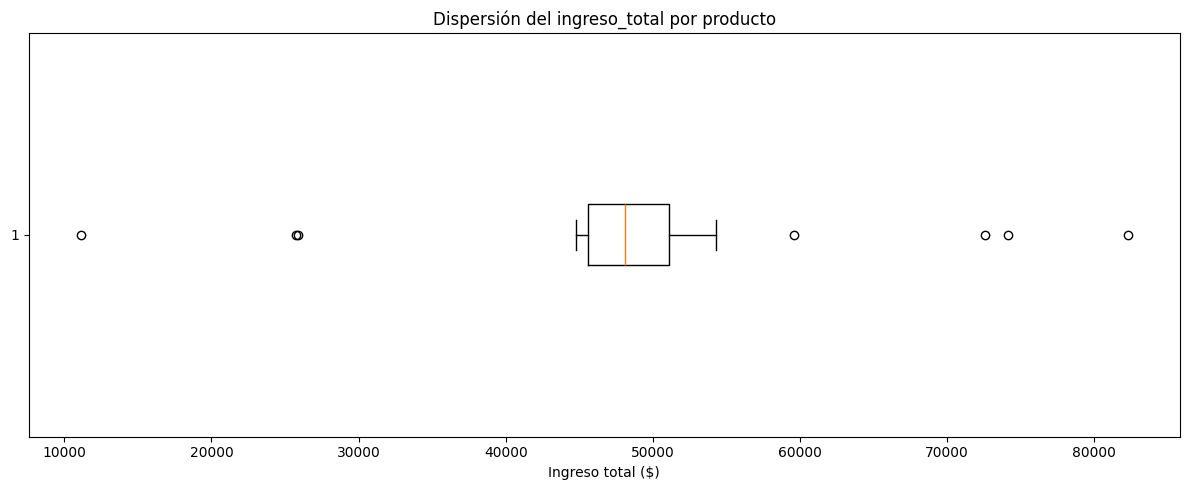

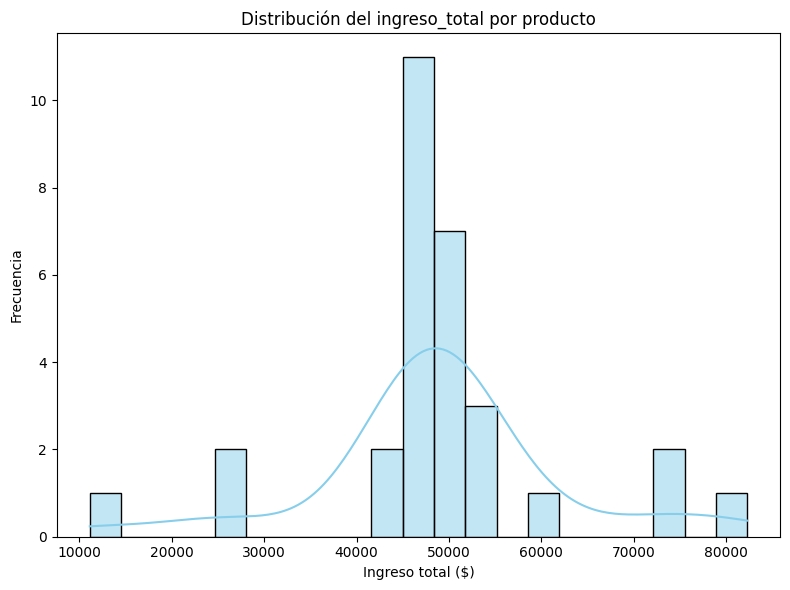

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# Valores a graficar
# ==========================================================
vals = resumen_prod['ingreso_total'].dropna()  # eliminar NaN

# ==========================================================
# 1) Boxplot: dispersión de ingreso_total por producto
# ==========================================================
plt.figure(figsize=(12,5))
plt.boxplot(vals, vert=False)
plt.title('Dispersión del ingreso_total por producto')
plt.xlabel('Ingreso total ($)')
plt.tight_layout()
plt.show()

# ==========================================================
# 2) Histograma con KDE: distribución del ingreso_total
# ==========================================================
plt.figure(figsize=(8,6))
sns.histplot(vals, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución del ingreso_total por producto')
plt.xlabel('Ingreso total ($)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## 🔍 EDA: patrones, gráficos y estructura de la distribución

Los gráficos complementaron la comprensión numérica:
* El histograma mostró que la mayoría de los ingresos se concentran entre 40.000 y 55.000, con una “cola” hacia valores altos.

* El boxplot reveló outliers positivos reales, no errores de carga.
Entre ellos se destacan Lámpara de Mesa, Auriculares, Microondas y otros productos de alto rendimiento. Estos outliers representan oportunidades comerciales y no deben eliminarse.

###3️⃣**Correlación**
**🎯 Objetivo:**
Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.

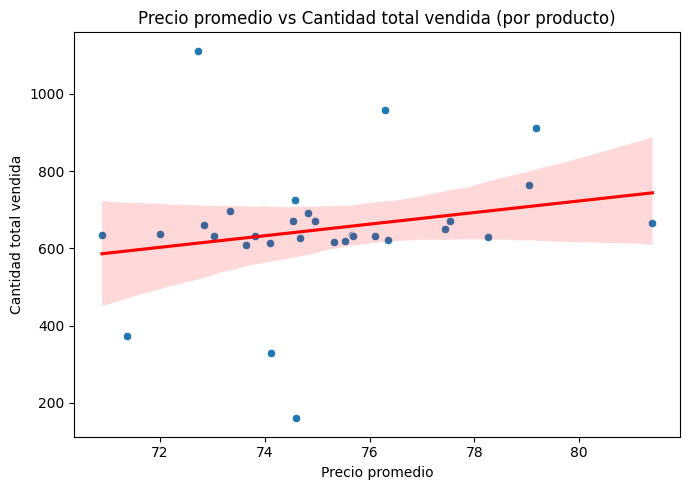

Coeficiente de correlación (Pearson): 0.211
Relación positiva débil a moderada.


In [ ]:
# Crear dataset para correlación basado en datos limpios
resumen_corr = (
    ventas_clean
    .groupby('producto', as_index=False)
    .agg(
        precio_promedio=('precio', 'mean'),   # promedio de precio por producto
        cantidad_total=('cantidad', 'sum')    # cantidad total vendida por producto
    )
)

# Scatterplot
x = resumen_corr['precio_promedio']
y = resumen_corr['cantidad_total']

plt.figure(figsize=(7,5))
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False, color='red')  # línea de tendencia
plt.title('Precio promedio vs Cantidad total vendida (por producto)')
plt.xlabel('Precio promedio')
plt.ylabel('Cantidad total vendida')
plt.tight_layout()
plt.show()

# Correlación
corr_val = resumen_corr[['precio_promedio','cantidad_total']].corr().loc['precio_promedio','cantidad_total']
print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")

# Interpretación automática
if corr_val > 0.8:
    print("Relación positiva clara.")
elif corr_val > 0.2:
    print("Relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Relación negativa clara.")
elif corr_val < -0.3:
    print("Relación negativa débil a moderada.")
else:
    print("Relación muy débil o nula.")


## 📊 Correlación: Precio promedio vs. Unidades vendidas
Para examinar la relación entre el precio promedio y las unidades vendidas, se calculó el coeficiente de correlación de Pearson, que resultó en:

📈 r ≈ +0.21, indicando una correlación positiva débil a moderada.

Interpretación: A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida. Esto sugiere que los productos con precio medio o alto —como la Lámpara de Mesa o el Microondas— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

Conclusión: Los datos muestran que el precio no es un factor que desaliente significativamente las ventas. La calidad, categoría o valor percibido parecen tener más peso que el valor monetario.

🧠 Asociación entre merge y correlación:

El merge dice qué ventas dependen de campañas y qué ventas son orgánicas.

La correlación dice cómo se relaciona el precio con la cantidad vendida.

Juntos aportan una visión más completa:

Aunque el precio no es un factor fuerte, los productos estrella (outliers positivos) venden mucho tanto con campañas como sin ellas.

El merge confirma que la mayoría de esas ventas ocurren sin marketing, lo que refuerza la idea de que la categoría y valor percibido pesan más que el precio o la campaña.

La correlación débil muestra que no basta con ajustar precios; el merge evidencia que invertir en campañas específicas (Email, TV) puede potenciar aún más los productos líderes.

📌 El análisis de correlación muestra que el precio promedio no explica fuertemente la variación en ventas (r ≈ 0.21). Al combinarlo con el merge ventas–marketing, se observa que la mayoría de las ventas de productos estrella ocurren de manera orgánica, lo que confirma que la categoría y el valor percibido tienen más peso que el precio o la campaña. Las campañas, aunque cubren solo el 26% de las ventas, resultan altamente eficientes y pueden potenciar aún más los productos líderes.

---

## IV) **Etapa 4: Visualización de Datos**

🎯**Objetivo:** Aprender a visualizar datos de manera efectiva utilizando diversas bibliotecas.
___

###1️⃣ **Visualización con Matplotlib**
🎯**Objetivo:**
Crear gráficos básicos (líneas, barras, dispersión) que representen las ventas con diferentes periodos de tiempo.

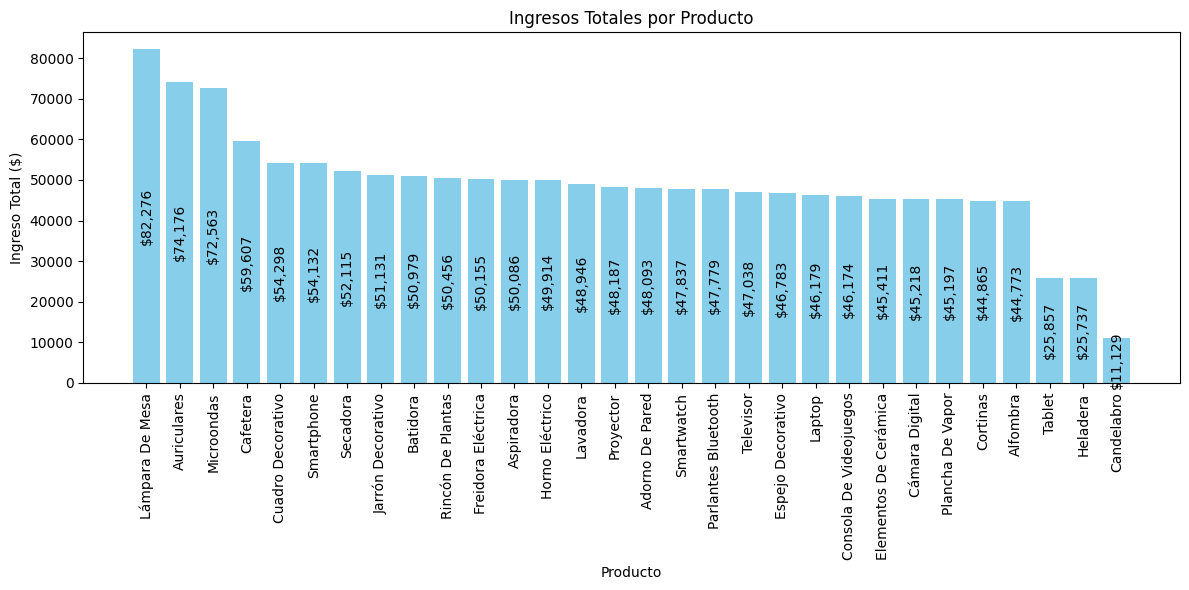

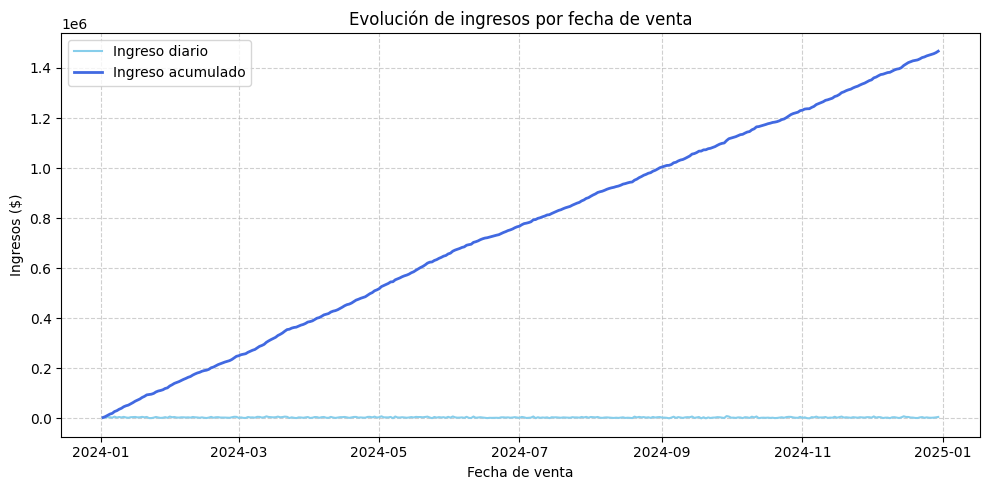

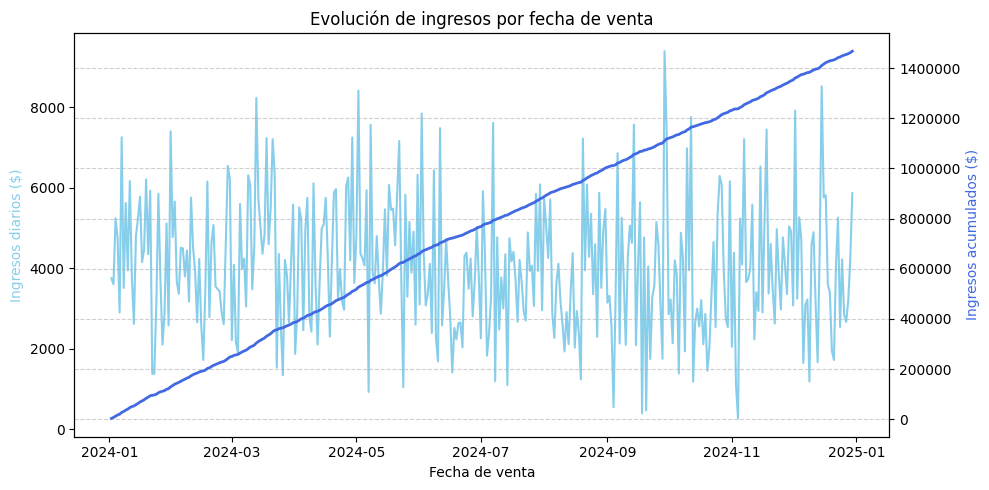

In [ ]:
# ==========================================================
# 1️⃣ Gráfico de barras: Ingreso total por producto
# ==========================================================

df = resumen_prod.copy()
df_ordenado = df.sort_values('ingreso_total', ascending=False)

plt.figure(figsize=(12,6))
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'], color='skyblue')
plt.title('Ingresos Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ingreso Total ($)')
plt.xticks(rotation=90)

# Etiquetas dentro de las barras
for b in barras:
    h = b.get_height()
    x_c = b.get_x() + b.get_width()/2
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)

plt.tight_layout()
plt.show()

# ==========================================================
# 2️⃣ Serie temporal: ingresos diarios y acumulados
# ==========================================================

# Ingreso diario por fecha
ingresos_por_dia = ventas_clean.groupby('fecha_venta')['ingreso'].sum().sort_index()
ingresos_acumulados = ingresos_por_dia.cumsum()

# Gráfico simple
plt.figure(figsize=(10,5))
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ==========================================================
# 3️⃣ Gráfico doble eje: ingresos diarios y acumulados
# ==========================================================
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='skyblue')
ax1.ticklabel_format(style='plain', axis='y')

ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis='y')

plt.title('Evolución de ingresos por fecha de venta')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###2️⃣ **Visualización Avanzada con Seaborn**
🎯**Objetivo:** Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.

## 1️⃣ Barras: ingresos totales por producto

/tmp/ipython-input-3574800443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


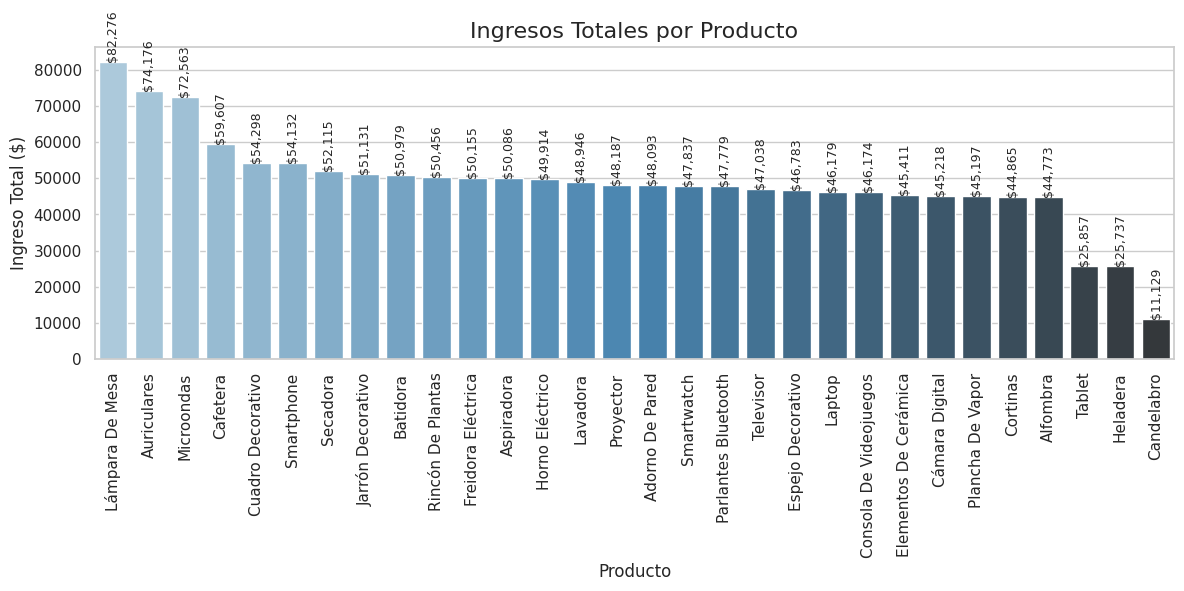

In [ ]:
sns.set_theme(style="whitegrid")

# ===========================
# 1️⃣ Barras: ingresos totales por producto
# ===========================
df_barras = resumen_prod.sort_values('ingreso_total', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_barras,
    x='producto',
    y='ingreso_total',
    palette="Blues_d"
)

ax.set_title('Ingresos Totales por Producto', fontsize=16)
ax.set_xlabel('Producto', fontsize=12)
ax.set_ylabel('Ingreso Total ($)', fontsize=12)
plt.xticks(rotation=90)

# Etiquetas de valor arriba de cada barra
for p in ax.patches:
    ax.annotate(
        f"${p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=90
    )

plt.tight_layout()
plt.show()


## 2️⃣ Boxplot: dispersión de ingresos por categoría

/tmp/ipython-input-3322469122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(


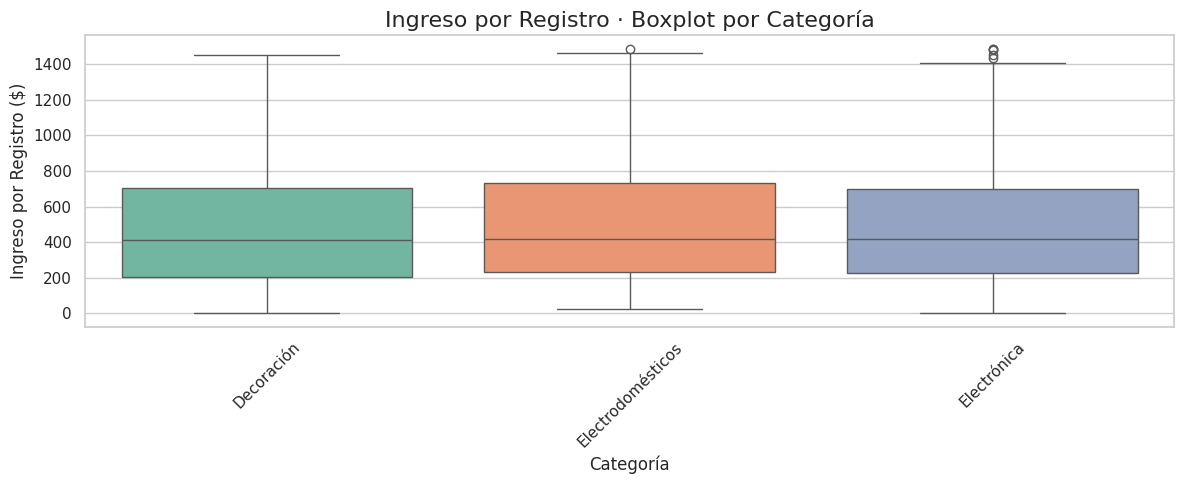

In [ ]:
plt.figure(figsize=(12, 5))
ax2 = sns.boxplot(
    data=ventas_clean,
    x='categoria',
    y='ingreso',
    palette="Set2"
)
ax2.set_title('Ingreso por Registro · Boxplot por Categoría', fontsize=16)
ax2.set_xlabel('Categoría', fontsize=12)
ax2.set_ylabel('Ingreso por Registro ($)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###3️⃣**Visualización Interactiva con Plotly**
**🎯 Objetivo:**
Construir un dashboard interactivo que combine múltiples visualizaciones, permitiendo al usuario explorar los datos dinámicamente.

In [ ]:
# ============================================
# 📊 VISUALIZACIÓN INTERACTIVA CON PLOTLY
# ============================================
import plotly.express as px
import plotly.graph_objects as go

# ============================================
#  KPI PRINCIPALES
# ============================================
total_ventas = ventas_clean["cantidad"].sum()
ticket_promedio = ventas_clean["ingreso"].sum() / ventas_clean["cantidad"].sum()
productos_unicos = ventas_clean["producto"].nunique()

print("📌 KPI PRINCIPALES")
print(f"➡️ Total de Ventas (unidades): {total_ventas}")
print(f"➡️ Ticket Promedio: ${ticket_promedio:.2f}")
print(f"➡️ Productos Únicos: {productos_unicos}")


# =========================================
# 1️⃣ Barras interactivas: ingresos por producto
# =========================================
fig_barras = px.bar(
    resumen_prod.sort_values('ingreso_total', ascending=False),
    x='producto',
    y='ingreso_total',
    title='Ingresos Totales por Producto',
    text='ingreso_total',
    labels={'ingreso_total': 'Ingreso Total ($)', 'producto': 'Producto'},
    hover_data=['ingreso_total']
)
fig_barras.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig_barras.update_layout(xaxis_tickangle=-45, yaxis_tickformat='$,')
fig_barras.show()


# =========================================
# 2️⃣ Treemap: productos más vendidos
# =========================================
ventas_prod = resumen_prod[['producto', 'cantidad_total']].rename(
    columns={'cantidad_total': 'cantidad'}
)

fig_treemap = px.treemap(
    ventas_prod,
    path=['producto'],
    values='cantidad',
    title="🟩 Productos Más Vendidos (Treemap)",
    color='cantidad',
    color_continuous_scale='Blues'
)
fig_treemap.show()


# =========================================
# 3️⃣ Boxplot por categoría: dispersión de ingresos
# =========================================
fig_box = px.box(
    ventas_clean,
    x='categoria',
    y='ingreso',
    color='categoria',
    title='Dispersión de ingresos por categoría',
    labels={'ingreso':'Ingreso por registro ($)', 'categoria':'Categoría'}
)
fig_box.update_layout(xaxis_tickangle=-45)
fig_box.show()


# =========================================
# 4️⃣ Línea interactiva: ingresos diarios y acumulados
# =========================================
ventas_clean['fecha_venta'] = pd.to_datetime(ventas_clean['fecha_venta'], errors='coerce')
ingresos_diarios = ventas_clean.groupby('fecha_venta')['ingreso'].sum().reset_index()
ingresos_diarios['acumulado'] = ingresos_diarios['ingreso'].cumsum()

fig_line = go.Figure()

# Línea 1: ingresos diarios
fig_line.add_trace(go.Scatter(
    x=ingresos_diarios['fecha_venta'],
    y=ingresos_diarios['ingreso'],
    mode='lines+markers',
    name='Ingreso diario'
))

# Línea 2: ingresos acumulados
fig_line.add_trace(go.Scatter(
    x=ingresos_diarios['fecha_venta'],
    y=ingresos_diarios['acumulado'],
    mode='lines+markers',
    name='Ingreso acumulado',
    line=dict(width=3)
))

fig_line.update_layout(
    title='Evolución de ingresos por fecha de venta',
    xaxis_title='Fecha de venta',
    yaxis_title='Ingresos ($)',
    yaxis_tickformat='$,',
    hovermode='x unified',
    template='plotly_white'
)
fig_line.show()


# =========================================
# 5️⃣ Línea de ventas diarias (unidades)
# =========================================
df_diario = ventas_clean.groupby("fecha_venta")["cantidad"].sum().reset_index()

fig_line2 = px.line(
    df_diario,
    x="fecha_venta",
    y="cantidad",
    title="📈 Ventas Diarias (Unidades)",
    markers=True
)
fig_line2.show()



📌 KPI PRINCIPALES
➡️ Total de Ventas (unidades): 19495
➡️ Ticket Promedio: $75.25
➡️ Productos Únicos: 30


1. Gráfico de Barras – Ingresos Totales por Producto
Qué muestra: Ordena los productos según el ingreso total generado.

Hallazgos:

    Lámpara de Mesa (≈ $82.000), Auriculares (≈ $74.000) y Microondas (≈ $72.500) son los líderes.

Conclusión: Los productos tecnológicos y de uso cotidiano concentran gran parte de las ventas, siendo estratégicos para campañas de marketing y promociones.

2. Serie Temporal – Ingresos Diarios y Acumulados

Qué muestra: Evolución de ingresos día a día y acumulados en el tiempo.

Hallazgos: La línea azul (acumulado) crece de forma constante, reflejando estabilidad. La línea celeste (diario) se percibe más plana en comparación, lo que dificulta distinguir picos.

Conclusión: Este gráfico comunica bien la tendencia global de crecimiento, aunque oculta la variabilidad diaria. Es útil para mostrar la solidez del negocio a largo plazo.


3. Gráfico Doble Eje – Ingresos Diarios vs Acumulados

Qué muestra: Compara ingresos diarios y acumulados en escalas distintas, usando dos ejes Y.

Hallazgos: La línea azul confirma el crecimiento sostenido, mientras que la línea celeste revela picos claros en octubre, que no se apreciaban en el gráfico simple.

Conclusión: Esta visualización permite comunicar simultáneamente la estabilidad acumulada y la dinámica diaria, destacando momentos clave de alta demanda que conviene analizar y aprovechar en futuras campañas.

4. Boxplot por Categoría – Ingreso por Registro

Descripción: Representa la distribución de ingresos por categoría de producto.

Hallazgos: Las cajas son similares, lo que indica homogeneidad en ingresos promedio. Sin embargo, aparecen outliers positivos en Electrodomésticos y Electrónica, que corresponden a productos estrella con ingresos muy superiores.

Conclusión: El portafolio es equilibrado, pero los outliers confirman la existencia de productos estratégicos que elevan el rendimiento y deben ser potenciados.

5️. Treemap – Productos Más Vendidos

Descripción: Visualiza la proporción de ventas por producto en bloques.

Hallazgos: Se distinguen claramente los productos estrella (bloques grandes) y los de bajo rendimiento (bloques pequeños).

Conclusión: El negocio depende de unos pocos productos líderes. Los artículos de bajo rendimiento representan oportunidades de mejora o reconsideración dentro del portafolio.

### 4️⃣**Presentación Final**
🎯**Objetivo:**
Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto. Presentar ante un panel simulado de "expertos" en SynthData, recibiendo feedback sobre el trabajo realizado.

---
Este proyecto permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de ventas y marketing. A través de la limpieza de datos, la estadística descriptiva y la elaboración de visualizaciones, se evidenció cómo cada etapa aporta claridad, precisión e información útil para la toma de decisiones basada en evidencia. Este enfoque integral facilitó la comprensión del comportamiento de los productos y las campañas, así como la identificación de oportunidades concretas para optimizar ingresos y estrategias de marketing.

---


ETAPA 1 y 2:

El proyecto comenzó con la **recopilación y exploración** de los datasets de `clientes, ventas y marketing`, evaluando su estructura, calidad y consistencia. En esta fase se **identificaron problemas** como **valores nulos, duplicados, formatos incorrectos y diferencias entre tipos de datos**. Este diagnóstico permitió planificar un proceso de limpieza sólido antes del análisis.

A continuación, se desarrolló un **preprocesamiento de limpieza y estandarización** completo que incluyó la **eliminación de duplicados, la normalización de textos, la conversión de columnas de fecha al formato estándar datetime, y la corrección de valores numéricos como precios y cantidades**.

También se creó la columna `ingreso_total = precio × cantidad`, esencial para medir el **rendimiento económico de cada producto** y realizar comparaciones posteriores. Con estas transformaciones, los tres datasets quedaron estandarizados y preparados para integrarse sin inconsistencias.

Con los **datos limpios**, se avanzó hacia el **análisis de productos y categorías**, donde se **identificaron los artículos de mejor desempeño** aplicando métricas como `ingresos totales, cantidad vendida y ticket promedio`. También se **detectaron outliers** y se **comparó el comportamiento entre categorías**. A partir del cálculo del **percentil 80**, se determinó el conjunto de productos que conforman **el Top 20 %**, **responsables de una proporción significativa del ingreso total**, lo que permitió reconocer a los principales generadores de valor.

En esta fase también se validó la cardinalidad entre los datasets antes de la integración:

En Marketing se confirmó que cada combinación campaña–producto presenta una relación 1:1, evitando duplicados internos.

La relación entre Ventas y Marketing es m:1, donde múltiples ventas pueden asociarse a una misma campaña, lo que refleja la dinámica real del negocio.

Se descartaron las cardinalidades 1:1 y m:m por no corresponder a la estructura de los datos ni a un flujo comercial coherente.

Finalmente, se realizó la **integración entre ventas y marketing** para comprender **el impacto de las campañas publicitarias**. Este **merge permitió distinguir ventas orgánicas de ventas asociadas a campañas, calcular KPIs por canal, evaluar el ROI y detectar cuáles campañas fueron más eficientes**. La combinación de información comercial y de inversión publicitaria ofreció una visión completa del negocio, revelando que **el rendimiento es alto incluso sin marketing, y que los canales de bajo costo como Email generan un retorno excepcional.**

En conjunto, estas etapas permitieron transformar datos dispersos en información estructurada, confiable y accionable, facilitando decisiones estratégicas vinculadas a productos, categorías y eficiencia de marketing.



ETAPA 3:

Con los datos ya depurados e integrados, se avanzó hacia **la fase de estadística descriptiva y análisis exploratorio** con el objetivo de comprender la estructura del dataset, identificar patrones relevantes y detectar posibles anomalías.
En esta etapa se **analizaron medidas centrales** como `media, mediana y moda`, junto con **métricas de dispersión** como `rangos, varianza y desvío estándar`, lo que permitió observar cómo se distribuyen las ventas y los precios dentro del portafolio.

El cálculo de `ingreso_total` posibilitó **evaluar el rendimiento económico de cada producto**, mientras que la **comparación entre media y mediana ayudó a detectar la influencia de valores atípicos**. Este contraste permitió confirmar la **presencia de outliers en precio y cantidad**, factores que pueden distorsionar las métricas y por eso fueron examinados en detalle.

A través de visualizaciones exploratorias —`como histogramas, boxplots y gráficos de dispersión`— **se identificaron tendencias, concentraciones de ventas y comportamientos particulares por producto**. También se realizaron **rankings por ingresos, ticket promedio y unidades vendidas,** lo que **ayudó a reconocer rápidamente tanto a los productos de alto rendimiento como a los artículos con bajo movimiento.**

📌 Medidas descriptivas del ingreso_total

Media: ≈ $49.000 → refleja el ingreso promedio del portafolio.

Mediana: ≈ $48.000 → ligeramente menor que la media, lo que indica sesgo positivo.

Moda: 11.128 (Candelabro) → valor repetido, pero considerablemente bajo en comparación.

Rango: ≈ $71.147 → gran diferencia entre el producto más bajo y el más alto.

Desvío estándar: ≈ $13.000 → dispersión moderada.

IQR: ≈ $5.491 → la mayoría de los ingresos se concentra en un rango estrecho.

👉 Interpretación general: La distribución es asimétrica y está influenciada por productos de alto rendimiento que elevan la media.

🚨 Detección de outliers
✔️ Outliers positivos (productos estrella):

Lámpara de Mesa — 82.276

Auriculares — 74.175

Microondas — 72.562

Cafetera — 59.607

Estos productos generan ingresos excepcionalmente altos y se comportan como motores de rentabilidad.

✔️ Outliers negativos (productos débiles):

Candelabro — 11.128

Heladera — 25.736

Tablet — 25.856

Son artículos de bajo desempeño que podrían requerir revisión de precios, reposicionamiento o cambios en estrategia promocional.

🔍 EDA visual: distribución, tendencia y rendimiento

Las visualizaciones permitieron profundizar en la estructura del dataset:

Histogramas: mostraron que los ingresos se agrupan entre 40.000 y 55.000, con una cola hacia valores altos.

Boxplots: confirmaron la existencia de outliers reales, no errores de carga.

Gráficos de dispersión: ayudaron a identificar patrones entre precio y unidades vendidas.

Rankings: permitieron detectar rápidamente los productos estrella y los productos rezagados.

📈 Correlación entre precio y unidades vendidas

Se calculó el coeficiente de Pearson:

→ r ≈ +0.21 → correlación positiva débil a moderada.

Interpretación:
A medida que aumenta el precio promedio, la cantidad vendida también tiende a aumentar ligeramente.
Esto indica que los productos más caros (como Microondas o Lámpara de Mesa) mantienen una buena demanda ya que su valor percibido y funcionalidad pesan más que el precio mismo.

🔗 Relación entre merge (ventas con campañas) y correlación

La integración de datos de marketing permitió unir:

Qué ventas provienen de campañas.

Qué ventas son orgánicas.

Cómo se relaciona esto con rendimiento, precio y demanda.

Hallazgos clave:

Solo el 26% de las ventas provienen de campañas (Email y TV principalmente).

Los productos estrella venden bien con y sin campañas, lo que confirma su fortaleza natural en el mercado.

La correlación débil entre precio y ventas muestra que ajustar precios no es suficiente para cambiar el rendimiento.

El merge demuestra que las campañas son eficientes, especialmente cuando se aplican sobre productos con alto valor percibido.

ETAPA 4:

En esta etapa se **transformaron los resultados del análisis en visualizaciones** específicas que permitieron interpretar el comportamiento de los productos, detectar tendencias temporales y comprender la composición del portafolio. Cada gráfico aportó un ángulo distinto del negocio, facilitando conclusiones accionables para ventas y marketing.

Se utilizaron herramientas como `Matplotlib, Seaborn y Plotly` para crear gráficos de barras, líneas, boxplots y treemaps. Cada visualización aportó una perspectiva clave sobre el desempeño del negocio.

📊 1. Gráfico de Barras — Ingresos Totales por Producto

Mostró qué productos generaron más ingresos.

Hallazgos claves:

Lámpara de Mesa, Auriculares y Microondas fueron los líderes, superando los $70.000 cada uno.

Conclusión: Los productos tecnológicos y de uso cotidiano sostienen la mayor parte del ingreso total.

📈 2. Serie Temporal — Ingresos Diarios y Acumulados

Permitió entender cómo evolucionaron las ventas en el tiempo.

Hallazgos claves:

El ingreso acumulado crece de manera estable.

Los valores diarios muestran variabilidad, pero no se aprecian fácilmente los picos.

Conclusión: La tendencia global del negocio es sólida y sostenida a lo largo del período.

📉 3. Gráfico de Doble Eje — Ingresos Diarios vs. Acumulados

Comparó ambas métricas en escalas diferentes.

Hallazgos claves:

Se destacan claramente picos de ventas en octubre.

El acumulado mantiene su crecimiento constante.

Conclusión: Este formato permite detectar momentos clave de alta demanda, ideales para campañas o promociones.

📦 4. Boxplot por Categoría — Ingreso por Registro

Visualizó la distribución de ingresos dentro de cada categoría.

Hallazgos claves:

Las categorías tienen medianas similares, pero Electrodomésticos y Electrónica presentan outliers altos.

Conclusión: El portafolio es equilibrado, pero existen productos estrella que elevan el rendimiento general.

🗂️ 5. Treemap — Productos Más Vendidos

Representó visualmente la proporción de ventas por producto mediante bloques.

Hallazgos claves:

Se identifican fácilmente los productos estrella (bloques grandes).

Muchos productos tienen ventas muy bajas (bloques pequeños).

Conclusión: El negocio depende de un conjunto reducido de productos líderes. Los de bajo rendimiento representan oportunidades de mejora o revisión estratégica.

# 📌 Resumen:
## 1. Productos líderes y categorías destacadas

Los productos que más ingresos generan son:
`Lámpara de Mesa, Auriculares y Microondas, seguidos por Cafetera y Smartphone.`

Están distribuidos en distintas categorías `(Decoración, Electrónica y Electrodomésticos)`, lo que muestra un **portafolio equilibrado** sin dependencia de un solo rubro.

## 2. Diferencia entre media y mediana:

Interpretación:

`Media ≈ 49.000`

`Mediana ≈ 48.000`

La **media es mayor que la mediana**, lo que señala una **distribución con sesgo positivo**:

👉 unos pocos productos de muy alto rendimiento empujan el promedio hacia arriba.
La mayoría de los productos tiene ingresos estables y similares, pero algunos destacan fuertemente.

## 3. Presencia de outliers y su impacto

* Outliers positivos:

`Lámpara de Mesa, Auriculares, Microondas y Cafetera` → generan ingresos muy superiores al resto.

Impacto: Son oportunidades estratégicas, no errores. Elevan la media y explican el sesgo positivo.

* Outliers negativos:

`Candelabro, Heladera, Tablet` → ingresos muy bajos.

Impacto: Marcan productos débiles que requieren revisión de precio, promoción o incluso replanteo del stock.

## 4. Recomendaciones

🔹 Productos a potenciar

`Lámpara de Mesa`

`Auriculares`

`Microondas`

👉 Son productos con alta demanda orgánica y gran aporte al ingreso total.

👉 Ideales para campañas de upselling, cross-selling y combos por categoría.

🔹 Marketing: eficiencia comprobada

* Solo el **26% de las ventas tiene campaña**, pero esas campañas tienen **ROI muy alto (80–150)**.

* `Email y TV` son los **canales más eficientes**.

* El negocio funciona muy bien incluso sin marketing (74% ventas orgánicas).

👉 Recomendación: invertir más en segmentación por Email y reforzar picos identificados en la serie temporal, especialmente para los productos estrella.